**Data Loading and Preprocessing**

In [ ]:
import pandas as pd

# Load Datasets (Ensure files are uploaded in Colab or accessible)
file_names = [
    'Crime_Incidents_in_2019.csv', 'Crime_Incidents_in_2020.csv',
    'Crime_Incidents_in_2021.csv', 'Crime_Incidents_in_2022.csv',
    'Crime_Incidents_in_2023.csv', 'Crime_Incidents_in_2024.csv'
]
datasets = [pd.read_csv(file) for file in file_names]

# Drop Irrelevant Columns (e.g., OCTO_RECORD_ID)
for data in datasets:
    data.drop(columns=['OCTO_RECORD_ID'], inplace=True)

# Define a function to extract datetime features
def extract_datetime_features(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df['Year'] = df[date_column].dt.year
    df['Month'] = df[date_column].dt.month
    df['Day'] = df[date_column].dt.day
    df['DayOfWeek'] = df[date_column].dt.dayofweek
    df['Hour'] = df[date_column].dt.hour
    return df

# Apply datetime feature extraction to each dataset
for data in datasets:
    data = extract_datetime_features(data, 'REPORT_DAT')

# Concatenate All Datasets
combined_data = pd.concat(datasets, ignore_index=True)

# Display number and percentage of missing values per column
missing_values_count = combined_data.isnull().sum()
missing_values_percentage = (combined_data.isnull().mean() * 100).round(2)
missing_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})
print("Missing values summary:\n", missing_summary)
print()
print("Starting Data Preprossing...")
# Drop non-essential columns with high missing rates
combined_data.drop(columns=['BID', 'END_DATE'], inplace=True)

# Fill DISTRICT and PSA with the most common value
combined_data['DISTRICT'] = combined_data['DISTRICT'].fillna(combined_data['DISTRICT'].mode()[0])
combined_data['PSA'] = combined_data['PSA'].fillna(combined_data['PSA'].mode()[0])

# Add a weekend indicator (1 if weekend, 0 otherwise)
combined_data['IsWeekend'] = combined_data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Categorize offenses as violent or non-violent
violent_offenses = ['HOMICIDE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']
combined_data['CrimeCategory'] = combined_data['OFFENSE'].apply(lambda x: 'Violent' if x in violent_offenses else 'Non-Violent')

# Save Final Processed Dataset
combined_data.to_csv('Final_Processed_Crime_Data.csv', index=False)
print("Data preprocessing complete. File saved as 'Final_Processed_Crime_Data.csv'")

Missing values summary:
                       Missing Values  Percentage
X                                  0        0.00
Y                                  0        0.00
CCN                                0        0.00
REPORT_DAT                         0        0.00
SHIFT                              0        0.00
METHOD                             0        0.00
OFFENSE                            0        0.00
BLOCK                              0        0.00
XBLOCK                             0        0.00
YBLOCK                             0        0.00
WARD                              38        0.02
ANC                                9        0.01
DISTRICT                         908        0.52
PSA                              966        0.56
NEIGHBORHOOD_CLUSTER               9        0.01
BLOCK_GROUP                       65        0.04
CENSUS_TRACT                      63        0.04
VOTING_PRECINCT                   10        0.01
LATITUDE                           0        

In [ ]:
# Display the first few rows and summary of the final processed dataset
print("First few rows of the preprocessed data:\n", combined_data.head())
print("\nSummary of the final preprocessed data:\n")
combined_data.info()

First few rows of the preprocessed data:
           X         Y       CCN                REPORT_DAT     SHIFT  METHOD  \
0  397837.0  136946.0  18220759 2019-01-02 13:48:03+00:00       DAY  OTHERS   
1  398098.0  136808.0  18221708 2019-01-01 20:48:01+00:00   EVENING  OTHERS   
2  397920.0  137620.0  19000241 2019-01-01 11:07:36+00:00  MIDNIGHT  OTHERS   
3  397919.0  137069.0  19000298 2019-01-01 18:51:03+00:00       DAY  OTHERS   
4  398946.0  139606.0  19000641 2019-01-02 03:49:37+00:00   EVENING  OTHERS   

        OFFENSE                               BLOCK    XBLOCK    YBLOCK  ...  \
0   THEFT/OTHER  900 - 999 BLOCK OF PALMER ALLEY NW  397837.0  136946.0  ...   
1   THEFT/OTHER    700 - 799 BLOCK OF 7TH STREET NW  398098.0  136808.0  ...   
2  THEFT F/AUTO  1200 - 1299 BLOCK OF 9TH STREET NW  397920.0  137620.0  ...   
3   THEFT/OTHER    900 - 999 BLOCK OF 9TH STREET NW  397919.0  137069.0  ...   
4  THEFT F/AUTO  2500 - 2999 BLOCK OF 1ST STREET NW  398946.0  139606.0  ...   

  

**Exploratory Data Analysis (EDA)**

<ipython-input-3-d069b9569fa3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=combined_data, palette='viridis')


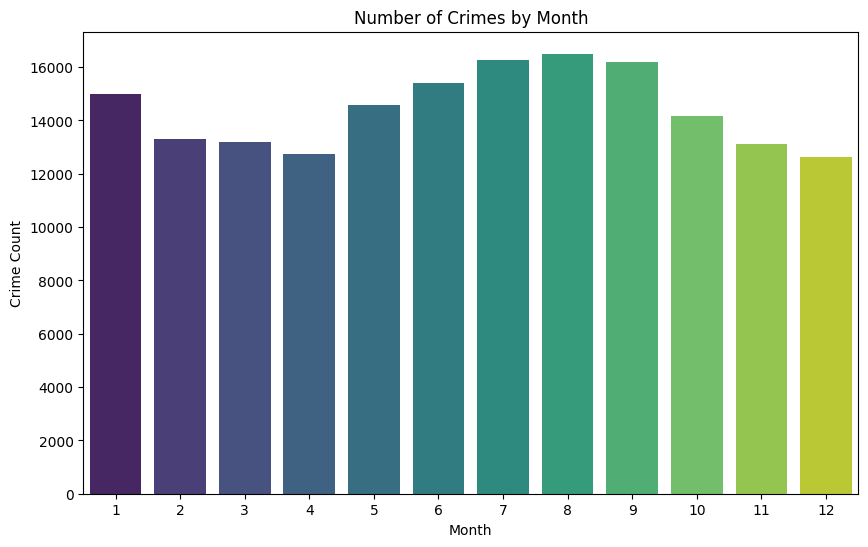

<ipython-input-3-d069b9569fa3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=combined_data, palette='plasma')


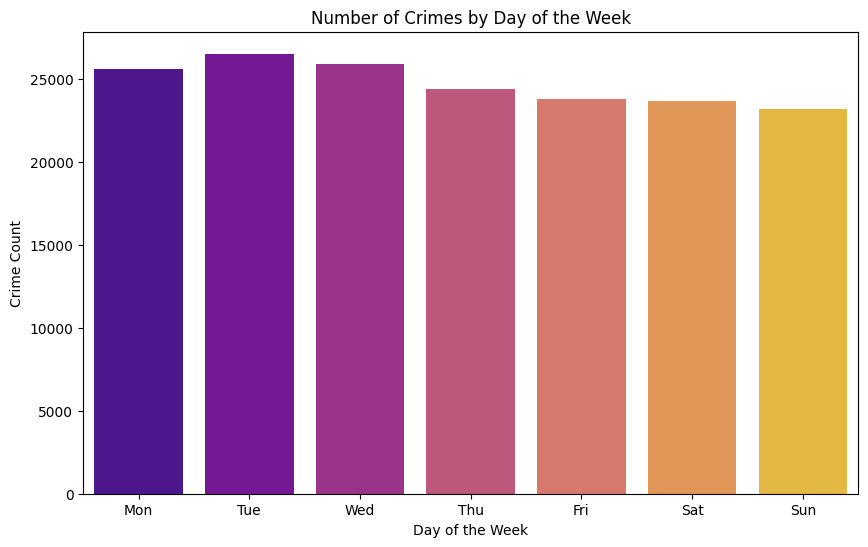

<ipython-input-3-d069b9569fa3>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=combined_data, palette='coolwarm')


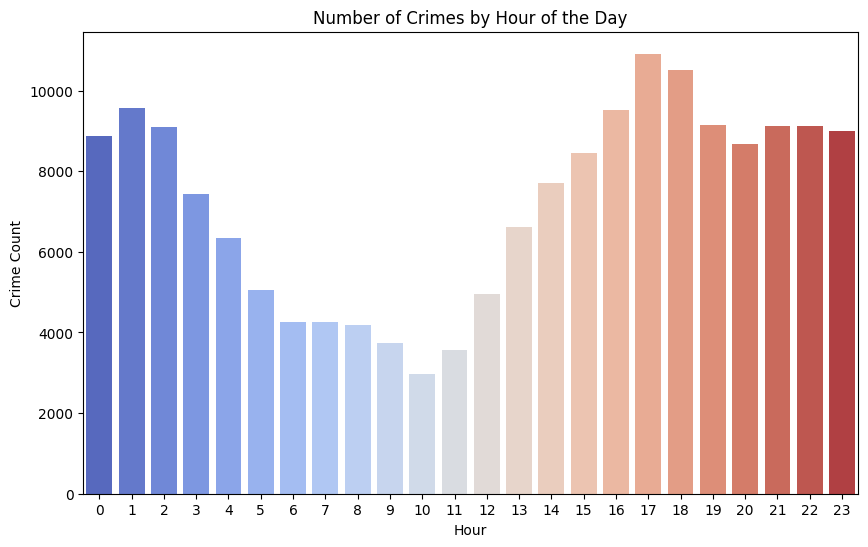

<ipython-input-3-d069b9569fa3>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CrimeCategory', data=combined_data, palette='Set2')


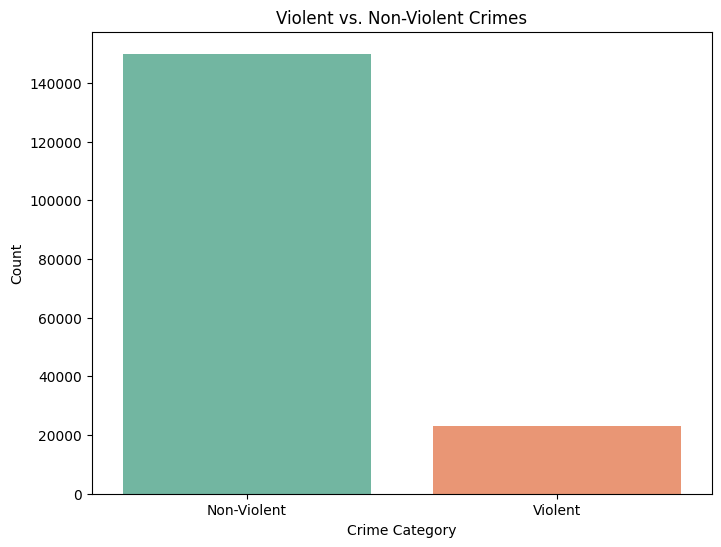

<ipython-input-3-d069b9569fa3>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SHIFT', data=combined_data, palette='magma')


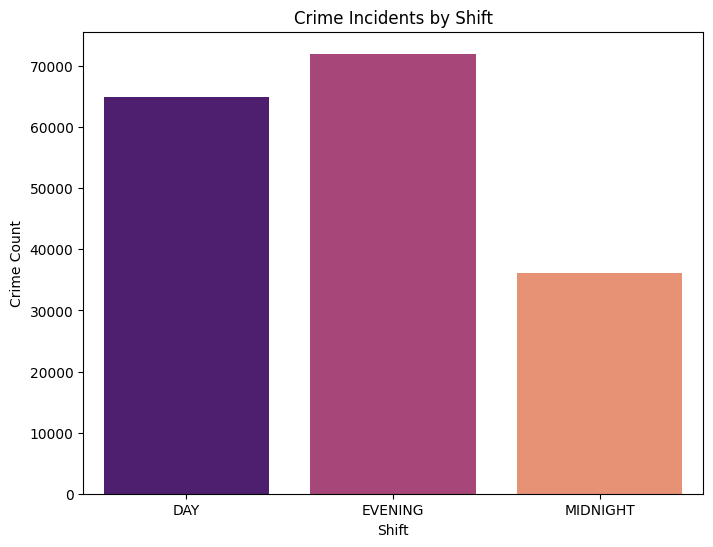

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the number of crimes by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=combined_data, palette='viridis')
plt.title('Number of Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.show()

# Plot the number of crimes by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=combined_data, palette='plasma')
plt.title('Number of Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Crime Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Plot the number of crimes by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=combined_data, palette='coolwarm')
plt.title('Number of Crimes by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Crime Count')
plt.show()

# Plot the distribution of violent vs. non-violent crimes
plt.figure(figsize=(8, 6))
sns.countplot(x='CrimeCategory', data=combined_data, palette='Set2')
plt.title('Violent vs. Non-Violent Crimes')
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.show()

# Plot the number of crimes by shift
plt.figure(figsize=(8, 6))
sns.countplot(x='SHIFT', data=combined_data, palette='magma')
plt.title('Crime Incidents by Shift')
plt.xlabel('Shift')
plt.ylabel('Crime Count')
plt.show()

**Spatial Distribution**

In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap

# Filter out rows without latitude and longitude data
crime_data_map = combined_data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Initialize the map centered around Washington, D.C.
m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)  # Washington, D.C. coordinates

# Prepare data for the heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in crime_data_map.iterrows()]

# Create a HeatMap layer
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)

# Display the map
m

m.save("Crime_Hotspot_Map.html")
from IPython.display import IFrame
IFrame("Crime_Hotspot_Map.html", width=800, height=600)

**Building a crime type prediction model**

Define Hotspots Using K-means Clustering

In [ ]:
from sklearn.cluster import KMeans

# Use latitude and longitude features for clustering
location_features = combined_data[['LATITUDE', 'LONGITUDE']]

# Set the number of clusters k
k = 5  # Adjust this number as needed

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=k, random_state=42)
combined_data['Cluster'] = kmeans.fit_predict(location_features)

# Mark clusters with high incident counts as hotspots
# Calculate the count of incidents in each cluster
cluster_counts = combined_data['Cluster'].value_counts()

# Define a threshold for hotspots (top 10% clusters by incident count)
hotspot_threshold = cluster_counts.quantile(0.9)
combined_data['IsHotspot'] = combined_data['Cluster'].apply(lambda x: 1 if cluster_counts[x] >= hotspot_threshold else 0)

Prepare the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features for prediction
features = combined_data[['DayOfWeek', 'Hour', 'SHIFT', 'METHOD', 'LATITUDE', 'LONGITUDE', 'IsWeekend']]
target = combined_data['IsHotspot']

# Encode categorical variables
features = pd.get_dummies(features, columns=['SHIFT', 'METHOD'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[['DayOfWeek', 'Hour', 'LATITUDE', 'LONGITUDE']] = scaler.fit_transform(X_train[['DayOfWeek', 'Hour', 'LATITUDE', 'LONGITUDE']])
X_test[['DayOfWeek', 'Hour', 'LATITUDE', 'LONGITUDE']] = scaler.transform(X_test[['DayOfWeek', 'Hour', 'LATITUDE', 'LONGITUDE']])

 Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate and display evaluation metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print(f"Precision: {precision_logistic:.2f}")
print(f"Recall: {recall_logistic:.2f}")

# Detailed classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic, target_names=['Non-Hotspot', 'Hotspot']))

Logistic Regression Model Performance:
Accuracy: 0.82
Precision: 0.76
Recall: 0.70

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

 Non-Hotspot       0.85      0.89      0.87     33868
     Hotspot       0.76      0.70      0.73     18049

    accuracy                           0.82     51917
   macro avg       0.81      0.79      0.80     51917
weighted avg       0.82      0.82      0.82     51917



Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Calculate and display evaluation metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)

print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_tree:.2f}")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall: {recall_tree:.2f}")

# Detailed classification report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree, target_names=['Non-Hotspot', 'Hotspot']))

Decision Tree Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Classification Report for Decision Tree:
              precision    recall  f1-score   support

 Non-Hotspot       1.00      1.00      1.00     33868
     Hotspot       1.00      1.00      1.00     18049

    accuracy                           1.00     51917
   macro avg       1.00      1.00      1.00     51917
weighted avg       1.00      1.00      1.00     51917



K-Nearest Neighbors (KNN) Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate and display evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) Model Performance:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")

# Detailed classification report
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn, target_names=['Non-Hotspot', 'Hotspot']))

K-Nearest Neighbors (KNN) Model Performance:
Accuracy: 0.99
Precision: 0.98
Recall: 0.99

Classification Report for KNN:
              precision    recall  f1-score   support

 Non-Hotspot       0.99      0.99      0.99     33868
     Hotspot       0.98      0.99      0.98     18049

    accuracy                           0.99     51917
   macro avg       0.99      0.99      0.99     51917
weighted avg       0.99      0.99      0.99     51917



In [ ]:
# Check the balance of hotspot vs. non-hotspot in the data
print("Distribution of 'IsHotspot' in training data:")
print(y_train.value_counts())

Distribution of 'IsHotspot' in training data:
IsHotspot
0    79398
1    41740
Name: count, dtype: int64


Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
logistic_scores = cross_val_score(LogisticRegression(random_state=42), X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy:", logistic_scores.mean())

# Cross-validation for Decision Tree with limited depth
tree_model_limited = DecisionTreeClassifier(max_depth=10, random_state=42)  # Set max_depth to limit overfitting
tree_scores = cross_val_score(tree_model_limited, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree (limited depth) Cross-Validation Accuracy:", tree_scores.mean())

# Cross-validation for KNN
knn_model_cv = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn_model_cv, X_train, y_train, cv=5, scoring='accuracy')
print("K-Nearest Neighbors Cross-Validation Accuracy:", knn_scores.mean())

Logistic Regression Cross-Validation Accuracy: 0.8233254937056971
Decision Tree (limited depth) Cross-Validation Accuracy: 0.9998514102269684
K-Nearest Neighbors Cross-Validation Accuracy: 0.988063200097144


Feature Importance for Decision Tree